In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN

#Sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , RandomizedLasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
#from sklearn.grid_search import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing

#Chi-square test
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

Using TensorFlow backend.


In [89]:
bike_rental = pd.read_csv('day.csv', header=[0])

In [90]:
df = bike_rental.copy()

In [91]:
df.head().iloc[:,0:9]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,2011-01-01,1,0,1,0,6,0,2
1,2,2011-01-02,1,0,1,0,0,0,2
2,3,2011-01-03,1,0,1,0,1,1,1
3,4,2011-01-04,1,0,1,0,2,1,1
4,5,2011-01-05,1,0,1,0,3,1,1


In [92]:
df.head().iloc[:,9:]

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
df.shape

(731, 16)

In [94]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [95]:
df.drop(columns=['instant', 'dteday','casual','registered'], inplace=True, axis=1)
df = df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month',\
                        'weathersit' : 'weather_type', 'hum' : 'humidity', 'cnt':'total_count'})
df.dtypes

season            int64
year              int64
month             int64
holiday           int64
weekday           int64
workingday        int64
weather_type      int64
temp            float64
atemp           float64
humidity        float64
windspeed       float64
total_count       int64
dtype: object

In [96]:
categorical_variable = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_type']
#df['date'] = pd.to_datetime(df['date'])
df[categorical_variable] = df[categorical_variable].apply(pd.Series.astype, dtype='category')
# df['day'] = df['date'].apply(lambda x: x.day)
# df['day'] = df['day'].astype('category')
#categorical_variable.append('day')
numerical_varible = [var for var in df.columns if var not in categorical_variable and var not in ['total_count']]

In [97]:
# col = df.columns.tolist()
# col.insert(2, col.pop(col.index('day')))
# df = df[col]
df.dtypes

season          category
year            category
month           category
holiday         category
weekday         category
workingday      category
weather_type    category
temp             float64
atemp            float64
humidity         float64
windspeed        float64
total_count        int64
dtype: object

In [98]:
df.isnull().sum()

season          0
year            0
month           0
holiday         0
weekday         0
workingday      0
weather_type    0
temp            0
atemp           0
humidity        0
windspeed       0
total_count     0
dtype: int64

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


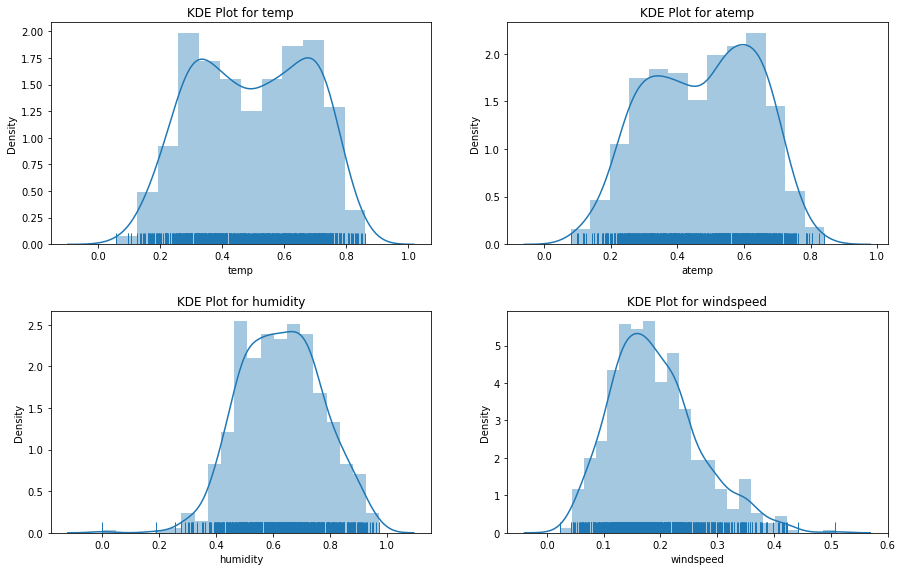

In [99]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.2)
fig.set_figheight(20)
fig.set_figwidth(15)

for pos, i in enumerate(numerical_varible):
    ax = fig.add_subplot(4, 2, pos+1)
    ax = sns.distplot(df[i], rug=True, hist=True)
    ax.set_xlabel(i)
    ax.set_ylabel('Density')
    ax.set_title('KDE Plot for {}'.format(i))
fig.savefig('Numerical_DistPlot', bbox_inches='tight')
# ax1 = fig.add_subplot(2, 2, 1)
# ax1 = sns.distplot(df['atemp'], rug=True, hist=True)
# ax1.set_xlabel('ATemp')  
# ax1.set_ylabel('Probability density ') 
# ax1.set_title("KDE Plot for ATemp") 

# ax1 = fig.add_subplot(2, 2, 2)
# ax1 = sns.distplot(df['temp'], rug=True, hist=True)
# ax1.set_xlabel('Temp')  
# ax1.set_ylabel('Probability density ') 
# ax1.set_title("KDE Plot for Temp") 

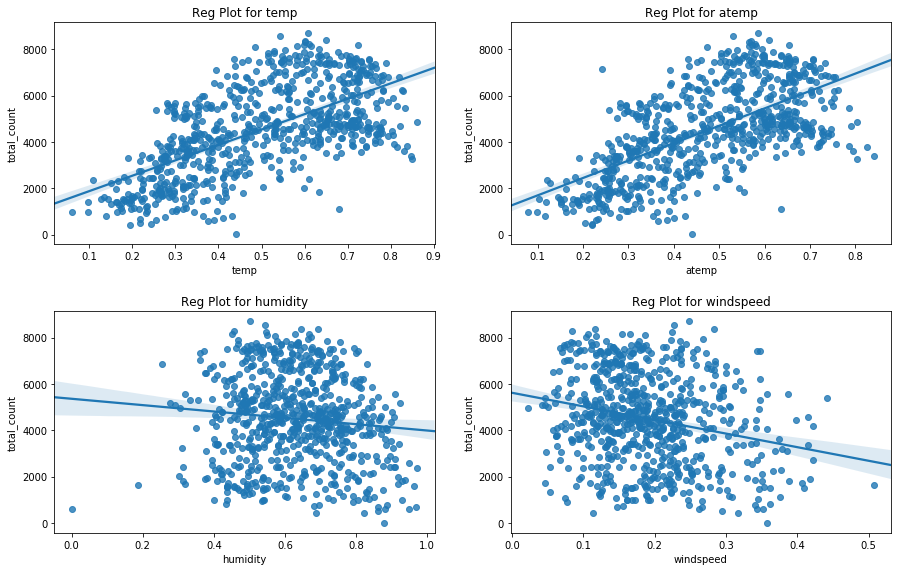

In [202]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.2)
fig.set_figheight(20)
fig.set_figwidth(15)

for pos, i in enumerate(numerical_varible):
    ax = fig.add_subplot(4, 2, pos+1)
    ax = sns.regplot(df[i],df['total_count'])
    ax.set_xlabel(i)
    ax.set_ylabel('total_count')
    ax.set_title('Reg Plot for {}'.format(i))
fig.savefig('Numerical_RegPlot', bbox_inches='tight')
# ax1 = fig.add_subplot(2, 2, 1)
# ax1 = sns.distplot(df['atemp'], rug=True, hist=True)
# ax1.set_xlabel('ATemp')  
# ax1.set_ylabel('Probability density ') 
# ax1.set_title("KDE Plot for ATemp") 

# ax1 = fig.add_subplot(2, 2, 2)
# ax1 = sns.distplot(df['temp'], rug=True, hist=True)
# ax1.set_xlabel('Temp')  
# ax1.set_ylabel('Probability density ') 
# ax1.set_title("KDE Plot for Temp") 

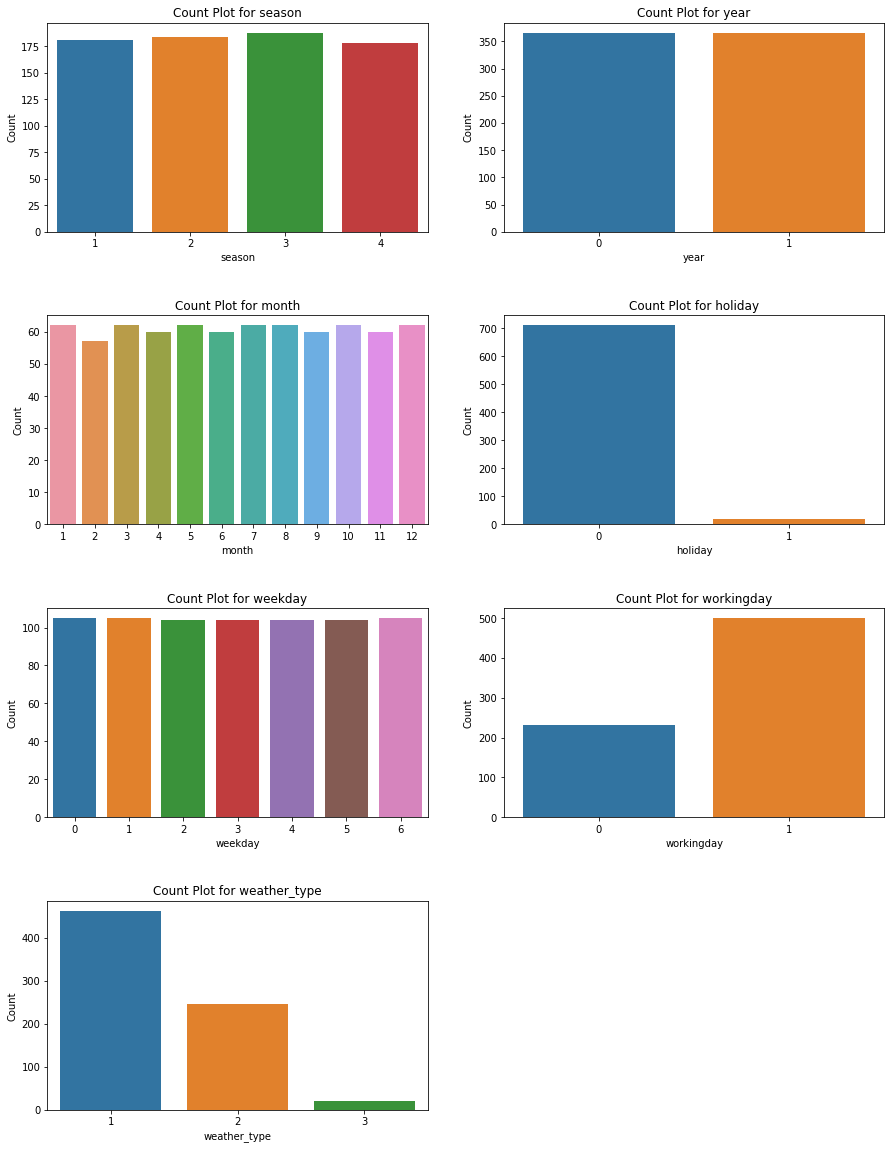

In [203]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.set_figheight(20)
fig.set_figwidth(15)

for pos, i in enumerate(categorical_variable):
    ax = fig.add_subplot(4, 2, pos+1)
    ax = sns.countplot(df[i])
    ax.set_xlabel(i)
    ax.set_ylabel('Count')
    ax.set_title('Count Plot for {}'.format(i))
fig.savefig('Categorical_CountPlot', bbox_inches='tight')

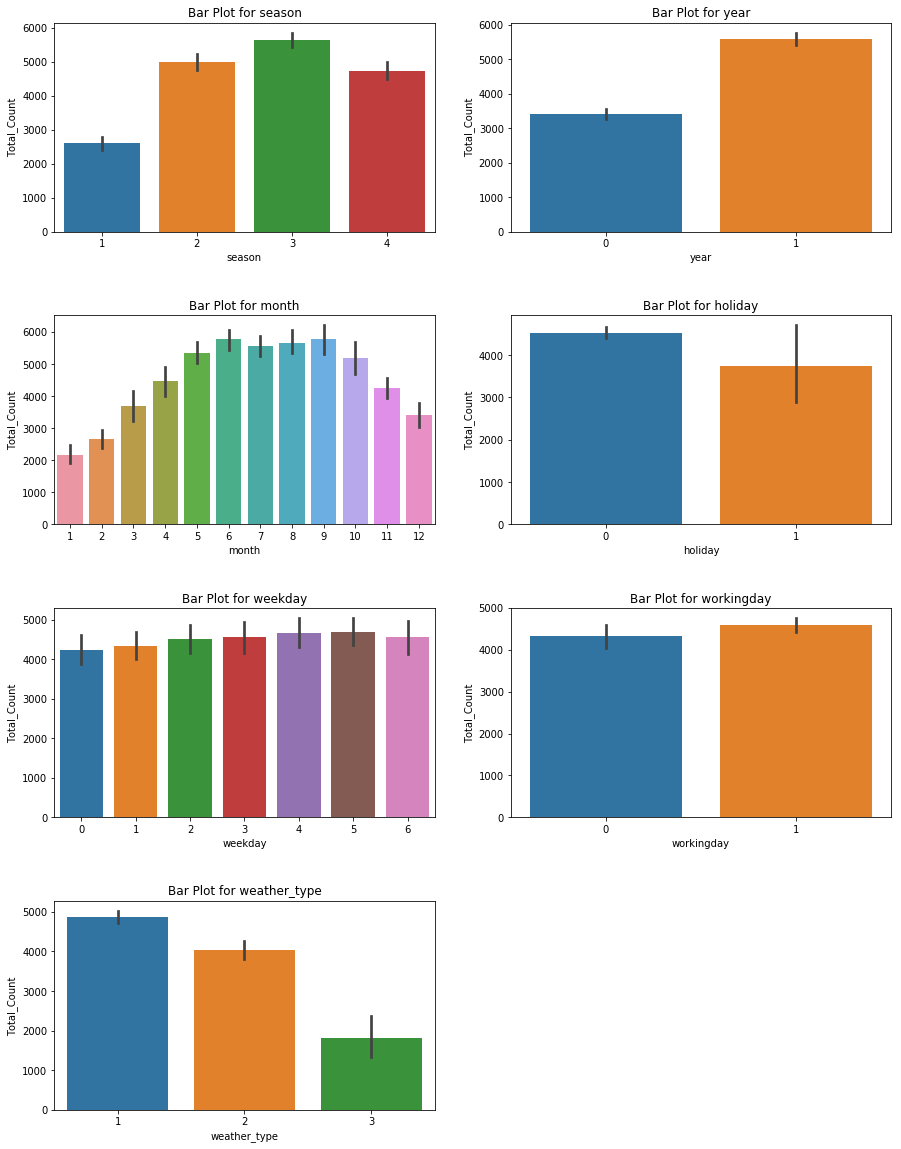

In [204]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.set_figheight(20)
fig.set_figwidth(15)

for pos, i in enumerate(categorical_variable):
    ax = fig.add_subplot(4, 2, pos+1)
    ax = sns.barplot(df[i], df['total_count'])
    ax.set_xlabel(i)
    ax.set_ylabel('Total_Count')
    ax.set_title('Bar Plot for {}'.format(i))
fig.savefig('Categorical_BarPlot', bbox_inches='tight')

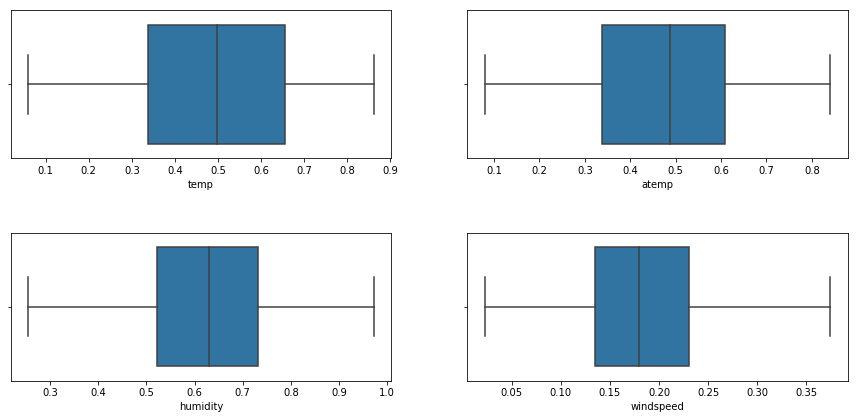

In [216]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.2)
fig.set_figheight(15)
fig.set_figwidth(15)

for pos,i in enumerate(numerical_varible):
    ax1 = fig.add_subplot(4, 2, pos+1)
    ax1 = sns.boxplot(df[i], data=df)
    #plt.savefig('Outliers_Visualization_{}'.format(pos))
    #plt.close()
fig.savefig('Outlier1', bbox_inches='tight')

In [100]:
for i in numerical_varible:
    q75, q25 = np.percentile(df.loc[:, i], [75, 25])
    iqr = q75 -q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    df.loc[df[i] < minimum,i] = np.nan
    df.loc[df[i] > maximum, i] = np.nan
print(df.isna().sum().sort_values(ascending=False))

windspeed       13
humidity         2
total_count      0
atemp            0
temp             0
weather_type     0
workingday       0
weekday          0
holiday          0
month            0
year             0
season           0
dtype: int64


In [101]:
# #date_value = df.drop(columns=['date'], axis=1)
# date_value = df['date']
# df = df.drop(columns=['date'],axis=1)

In [102]:
df = pd.DataFrame(KNN(k=3).fit_transform(df), columns=df.columns)
df[categorical_variable] = df[categorical_variable].apply(pd.Series.astype, dtype='category')

Imputing row 1/731 with 0 missing, elapsed time: 0.115
Imputing row 101/731 with 0 missing, elapsed time: 0.115
Imputing row 201/731 with 0 missing, elapsed time: 0.115
Imputing row 301/731 with 0 missing, elapsed time: 0.115
Imputing row 401/731 with 0 missing, elapsed time: 0.115
Imputing row 501/731 with 0 missing, elapsed time: 0.115
Imputing row 601/731 with 0 missing, elapsed time: 0.115
Imputing row 701/731 with 0 missing, elapsed time: 0.131


In [103]:
# df['date'] = date_value

In [104]:
# col = df.columns.tolist()
# col.insert(2, col.pop(col.index('date')))
# df = df[col]

In [18]:
# df['total_count'] = df['casual'] + df['registered']

In [220]:
#Getting the Pearson Correlation Matrix
correlation_data = df.copy()
corr = correlation_data.corr()
#Masking to get the Lower Triangular Matrix and masking the Upper Triangular Matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Color map for plot
cmap = sns.diverging_palette(220, 10, as_cmap=True)

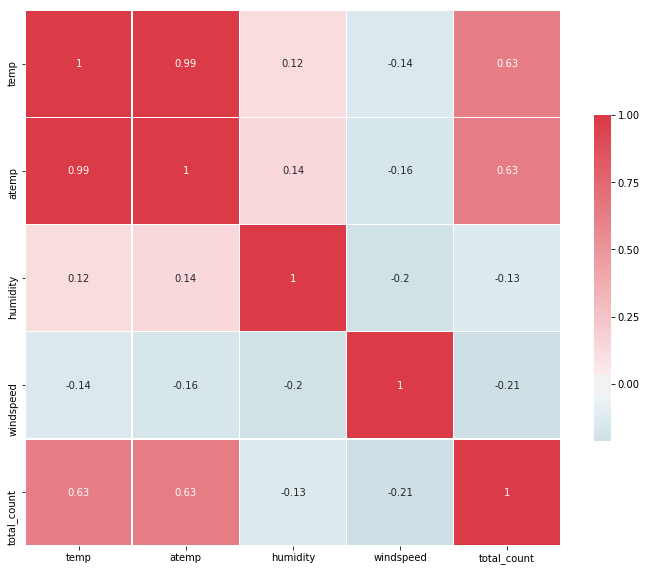

In [223]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .6}, annot=True)
f.savefig('Correlation', bbox_inches='tight')

In [267]:
numerical_varible.append('total_count')

In [268]:
X = df[numerical_varible].assign(const = 1)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)

temp           63.124711
atemp          64.145242
humidity        1.169077
windspeed       1.148615
total_count     1.882230
const          52.962046
dtype: float64

Will Drop temperature as it is highly correlated with temp.
Also dropping the registered and casual as they are already described by the total_count variable.

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

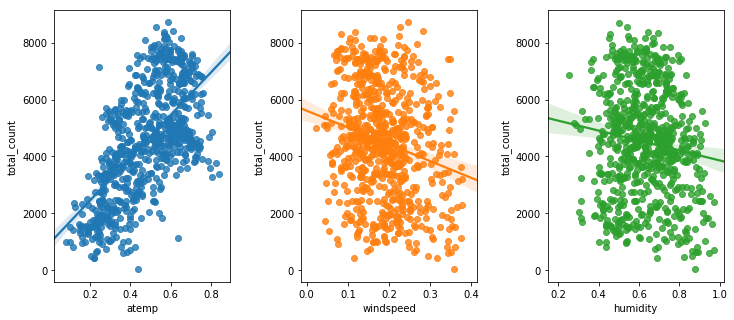

In [87]:
fig = plt.figure()
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.subplots_adjust(hspace=0.2, wspace=0.4)
fig.set_size_inches(12, 5)
sns.regplot(x="atemp", y="total_count", data=df,ax=ax1)
sns.regplot(x="windspeed", y="total_count", data=df,ax=ax2)
sns.regplot(x="humidity", y="total_count", data=df,ax=ax3)
f.savefig('Correlation', bbox_inches='tight')

In [228]:
#Finding correlation between categorical variables
category = df.loc[:, categorical_variable]

#Factorinzing the columns
factors_paired = [(i,j) for i in category.columns.values for j in category.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    #print(f[0], f[1])
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(category[f[0]], category[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      #for same factor pair
        chi2.append(0)
        p_values.append(0)
chi2 = np.array(p_values).reshape((7,7)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index = category.columns.values, columns=category.columns.values)

In [229]:
chi2

,season,year,month,holiday,weekday,workingday,weather_type
season,0.000000,0.999929,0.000000,6.831687e-01,1.000000e+00,8.865568e-01,0.021179
year,0.999929,0.000000,1.000000,9.949247e-01,9.999996e-01,9.799434e-01,0.127379
month,0.000000,1.000000,0.000000,5.593083e-01,1.000000e+00,9.933495e-01,0.014637
holiday,0.683169,0.994925,0.559308,0.000000e+00,8.567055e-11,4.033371e-11,0.600857
weekday,1.000000,1.000000,1.000000,8.567055e-11,0.000000e+00,6.775031e-136,0.278459
workingday,0.886557,0.979943,0.993350,4.033371e-11,6.775031e-136,0.000000e+00,0.253764
weather_type,0.021179,0.127379,0.014637,6.008572e-01,2.784593e-01,2.537640e-01,0.000000


In [105]:
total_count_bkp = df['total_count'].copy()

In [106]:
df['total_count'] = (df['total_count']-min(df['total_count']))/(max(df['total_count'])-min(df['total_count']))

In [271]:
## anova test 
from scipy import stats
for i in categorical_variable:
    print(i) 
    print(stats.f_oneway(df[i],df['total_count']))

season
F_onewayResult(statistic=2234.713103646848, pvalue=1.1812270473734066e-296)
year
F_onewayResult(statistic=0.5484219214325797, pvalue=0.459082290681056)
month
F_onewayResult(statistic=2202.389018708023, pvalue=7.235142916185671e-294)
holiday
F_onewayResult(statistic=2233.404127716876, pvalue=1.530113752898726e-296)
weekday
F_onewayResult(statistic=1106.374287154643, pvalue=4.742367523581619e-181)
workingday
F_onewayResult(statistic=77.81396335997938, pvalue=3.162407011821232e-18)
weather_type
F_onewayResult(statistic=1632.0856144299062, pvalue=3.56582852113021e-240)


In [274]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
for i in categorical_variable:
    mod = ols('total_count ~ df[i]',
                    data=df).fit()

    aov_table = sm.stats.anova_lm(mod, typ=2)
    print ( aov_table)

             sum_sq     df           F        PR(>F)
df[i]     12.582197    3.0  128.769622  6.720391e-67
Residual  23.678611  727.0         NaN           NaN
             sum_sq     df           F        PR(>F)
df[i]     11.645517    1.0  344.890586  2.483540e-63
Residual  24.615291  729.0         NaN           NaN
             sum_sq     df          F        PR(>F)
df[i]     14.165189   11.0  41.903703  4.251077e-70
Residual  22.095619  719.0        NaN           NaN
             sum_sq     df         F    PR(>F)
df[i]      0.169389    1.0  3.421441  0.064759
Residual  36.091419  729.0       NaN       NaN
             sum_sq     df         F    PR(>F)
df[i]      0.233737    6.0  0.782862  0.583494
Residual  36.027071  724.0       NaN       NaN
             sum_sq     df         F    PR(>F)
df[i]      0.135618    1.0  2.736742  0.098495
Residual  36.125190  729.0       NaN       NaN
             sum_sq     df          F        PR(>F)
df[i]      3.595519    2.0  40.066045  3.106317e-17

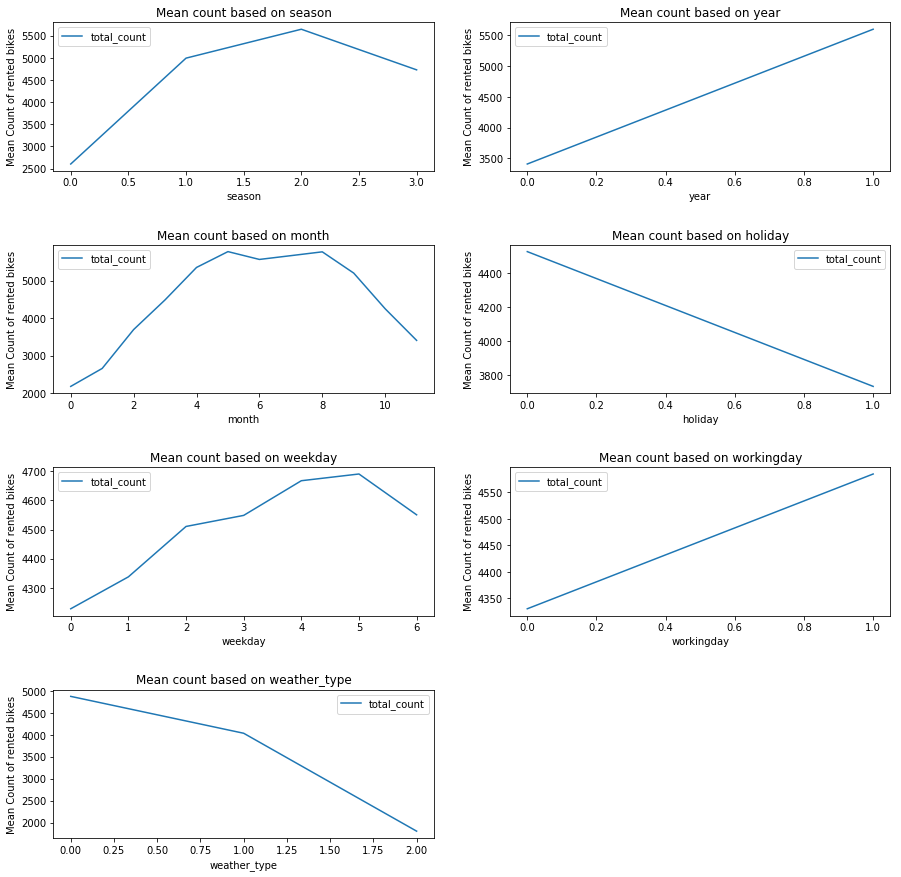

In [93]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.2)
fig.set_figheight(15)
fig.set_figwidth(15)

for pos, i in enumerate(categorical_variable):
    value = pd.DataFrame(df.groupby([i])['total_count'].mean())
    value.reset_index(inplace=True)
    ax = fig.add_subplot(4, 2, pos+1)
    value.plot(kind='line',ax=ax)
    ax.set_xlabel(i)  #X-axis label
    ax.set_ylabel('Mean Count of rented bikes') #Y-axis label
    ax.set_title("Mean count based on {}".format(i)) #Chart title
f.savefig('Mean VS Category', bbox_inches='tight')

In [107]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_type', 'temp', 'atemp', 'humidity', 'windspeed',
       'total_count'],
      dtype='object')

In [108]:
df = df.drop(['temp', 'weekday'], axis=1)

In [109]:
df2 = df.copy()

In [110]:
# scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
# scaled_data = scaler.fit_transform(df[['total_count']])

In [111]:
# scaled_data = pd.DataFrame(scaled_data)
# scaled_data = scaled_data.rename(columns = {0 : 'total_count'})

In [112]:
#df2['total_count'] = (df2['total_count']-min(df2['total_count']))/(max(df2['total_count'])-min(df2['total_count']))

In [113]:
# col = df2.columns.tolist()
# col.insert(len(col)-1, col.pop(col.index('total_count')))
# df2 = df2[col]

In [114]:
X = df2.iloc[:, 0:len(df2.columns.tolist())-1]
Y = df2.iloc[:,len(df2.columns.tolist())-1]

In [115]:
x_train, x_cv, y_train, y_cv = train_test_split(X, Y , test_size = 0.2, random_state=1)

In [116]:
# x_train  = x_train.drop(dropFeatures,axis=1)
# x_cv  = x_cv.drop(dropFeatures,axis=1)

In [117]:
gbm = GradientBoostingRegressor()

gbm.fit(x_train, y_train)
preds_gbm = gbm.predict(x_cv)

#R -square
score = gbm.score(x_cv, y_cv)
print ('GBM R square: %.4f' % score)

#RMSE
mse = mean_squared_error(preds_gbm, y_cv)
rmse = np.sqrt(mse)
print('Gradient Boosting RMSE: %.4f' % rmse)

GBM R square: 0.9094
Gradient Boosting RMSE: 0.0666


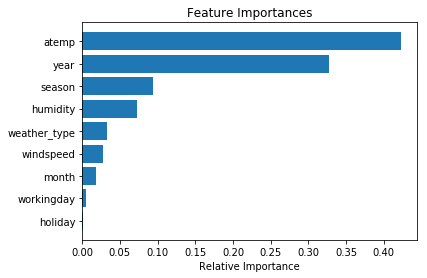

In [41]:
features = df2.columns
importances = gbm.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('FI_gbm', bbox_inches='tight')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=500)
#yLabelsLog = np.log1p(yLabels)
rfModel.fit(x_train, y_train)
preds_rf = rfModel.predict(x_cv)


#R -square
score = rfModel.score(x_cv, y_cv)
print ('Random Forest R square: %.4f' % score)


#RMSE
mse = mean_squared_error(preds_rf, y_cv)
rmse = np.sqrt(mse)
print('Random Forest RMSE: %.4f' % rmse)

Random Forest R square: 0.9057
Random Forest RMSE: 0.0679


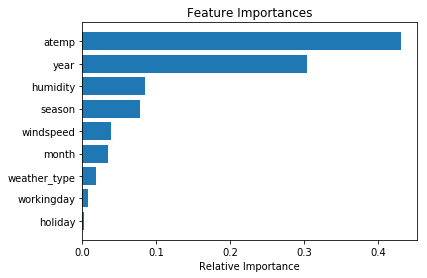

In [42]:
features = df2.columns
importances = rfModel.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('FI_rf', bbox_inches='tight')
plt.show()

In [43]:
dtmodel = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

#yLabelsLog = np.log1p(yLabels)
#yLabelsLogtest = np.log1p(ytestLabels)

dtmodel.fit(x_train, y_train)

pred_dt = dtmodel.predict(x_cv)
dtmodel
#print ("RMSLE Value Decision tree", rmsle(np.exp(yLabelsLogtest),np.exp(preds),False))

#print ("RMSLE Value For Decision Tree: ",rmsle(np.exp(yLabelsLogtest),np.exp(predictions),False))
#R -square
score = dtmodel.score(x_cv, y_cv)
print ('Decsion Tree R square: %.4f' % score)


#RMSE
mse = mean_squared_error(pred_dt, y_cv)
rmse = np.sqrt(mse)
print('Decision tree RMSE: %.4f' % rmse)

Decsion Tree R square: 0.7763
Decision tree RMSE: 0.1046


In [32]:
print(dict(zip(df2.columns, dtmodel.feature_importances_)))

{'season': 0.08726579087718916, 'year': 0.3809434456354499, 'month': 0.0, 'holiday': 0.0, 'workingday': 0.0, 'weather_type': 0.0, 'atemp': 0.46156136960513167, 'humidity': 0.07022939388222922, 'windspeed': 0.0}


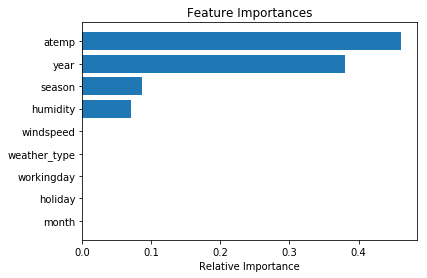

In [44]:
features = df2.columns
importances = dtmodel.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('FI_df', bbox_inches='tight')
plt.show()

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.feature_extraction import DictVectorizer


In [35]:
dot_data = StringIO()
export_graphviz(dtmodel, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [34]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)
pred_mlr = mlr.predict(x_cv)
score = dtmodel.score(x_cv, y_cv)
print ('MLR square: %.4f' % score)
#RMSE
mse = mean_squared_error(pred_mlr, y_cv)
rmse = np.sqrt(mse)
print('MLR RMSE: %.4f' % rmse)

MLR square: 0.7763
MLR RMSE: 0.0910


In [36]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
y_cv[y_cv == 0] = 0.1
mape = mean_absolute_percentage_error(y_cv.values, pred_dt)
print("Mean Absolute Percentage error for Decision Tree Model: %.4f" % mape)

Mean Absolute Percentage error for Decision Tree Model: 24.3580


In [38]:
mape = mean_absolute_percentage_error(y_cv.values, pred_mlr)
print("Mean Absolute Percentage error for Multiple Linear Regression Model: %.4f" % mape)

Mean Absolute Percentage error for Multiple Linear Regression Model: 17.6219


In [39]:
mape = mean_absolute_percentage_error(y_cv.values, preds_rf)
print("Mean Absolute Percentage error for Random Forest Model: %.4f" % mape)

Mean Absolute Percentage error for Random Forest Model: 14.6817


In [40]:
mape = mean_absolute_percentage_error(y_cv.values, preds_gbm)
print("Mean Absolute Percentage error for Gradient Boosting Model: %.4f" % mape)

Mean Absolute Percentage error for Gradient Boosting Model: 13.5292


In [49]:
x_cv.head()

,season,year,month,holiday,workingday,weather_type,atemp,humidity,windspeed
404,1.0,1.0,2.0,0.0,1.0,1.0,0.261988,0.562083,0.194037
726,1.0,1.0,12.0,0.0,1.0,2.0,0.226642,0.652917,0.350133
159,2.0,0.0,6.0,0.0,1.0,2.0,0.757579,0.568333,0.149883
422,1.0,1.0,2.0,0.0,1.0,1.0,0.357954,0.490833,0.268033
512,2.0,1.0,5.0,0.0,0.0,1.0,0.641425,0.697083,0.215171


In [84]:
x_cv.columns

Index(['season', 'year', 'month', 'holiday', 'workingday', 'weather_type',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [129]:
import math

In [130]:
"""
Sample taking 
Season = 1
Year = 1
Month = 2
Holiday = 0
Workingday = 1
Weather_type = 1
Atemp = 0.261988
Humidity = 0.562083
Windspeed = 0.194037
"""

'\nSample taking \nSeason = 1\nYear = 1\nMonth = 2\nHoliday = 0\nWorkingday = 1\nWeather_type = 1\nAtemp = 0.261988\nHumidity = 0.562083\nWindspeed = 0.194037\n'

In [131]:
result = gbm.predict([[1,1,2,0,1,1,0.261988,0.562083,0.194037]])

In [134]:
print('Total Count based on Input is', math.ceil((result)*(max(total_count_bkp)-min(total_count_bkp))+min(total_count_bkp)))

Total Count based on Input is 3516
